# Lead Score Case Study



### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. 


**What the company wants?**

Although X Education gets a lot of leads, its lead conversion rate is very poor.__The typical lead conversion rate at X education is around 30%.__

1. Identify the most potential leads, also known as ‘Hot Leads’  
2. Lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


### Goals of Case Study:
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. In case the company's requirement changes in the future it should be handled well.

### Steps:
1. Read and Understand data
2. Data Cleaning and Analysis
3. Data Preparation
4. Modelling
5. Model Evaluation
6. Prediction on Test 
7. Conclusion

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",150)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [8]:
import statsmodels.api as sm

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### 1. Read and Understand Data 

In [11]:
df = pd.read_csv("Leads.csv")

In [12]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [13]:
df.shape

(9240, 37)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### 2. Data Cleaning and Analysis

__Handling Select__

In [16]:
#Check manually for "Select"
print(df["Specialization"].unique())
print("-------------------------------------------------------------------------------------")
print(df["How did you hear about X Education"].unique())
print("-------------------------------------------------------------------------------------")
print(df["City"].unique())
print("-------------------------------------------------------------------------------------")
print(df["Lead Profile"].unique())

['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']
-------------------------------------------------------------------------------------
['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']
-------------------------------------------------------------------------------------
['Select' 'Mumbai' nan 'Thane & Outskirts' 'Other Metro Cities'
 'Other Cities' 'Other Cities of Maharashtra' 'Tier II Cities']
-------------------------------------------------------------------------------------
['Select' 'Potential Lead' 

In [17]:
#Replace "Select" with np.NaN

list_select = ["Specialization","How did you hear about X Education","City","Lead Profile"]

for value in list_select:
    df[value].replace("Select", np.nan,inplace=True)
    

__Handling Missing Values in rows__

In [18]:
null_rows=round(((df.isna().sum(axis=1))/df.shape[1]) * 100,2)
print(null_rows[null_rows > 35])


2671    35.14
2693    35.14
2700    35.14
2733    35.14
2739    35.14
        ...  
7031    35.14
7151    35.14
7160    35.14
7217    35.14
7258    35.14
Length: 415, dtype: float64


In [19]:
df = df[df.isnull().sum(axis=1) <= 10]


__Handling Missing Values in columns__

In [20]:
#Finding the percentage of missing value
perct_missing_values = round((df.isnull().sum()/df.shape[0])*100,2)

In [21]:
#sorting the percentage by descending order
perct_missing_values.sort_values(ascending=False)

How did you hear about X Education               76.30
Lead Profile                                     71.60
Lead Quality                                     46.90
Asymmetrique Profile Score                       40.20
Asymmetrique Activity Score                      40.20
Asymmetrique Activity Index                      40.20
Asymmetrique Profile Index                       40.20
City                                             33.75
Specialization                                   30.36
Tags                                             30.30
What matters most to you in choosing a course    24.37
What is your current occupation                  24.14
Country                                          22.22
Page Views Per Visit                              1.30
TotalVisits                                       1.30
Last Activity                                     0.96
Lead Source                                       0.35
Receive More Updates About Our Courses            0.00
I agree to

In [22]:
#Prepare a list for the features to be dropped with higher missing values

list_with_missingValues = ["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index",
                           "Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index"]

In [23]:
df.drop(inplace=True, axis=1,columns=list_with_missingValues)

In [24]:
df.shape

(8397, 30)

__Checking unique values in categorical columns__

In [25]:
for values in df.columns:
    print(values ," : ", df[values].nunique())

Prospect ID  :  8397
Lead Number  :  8397
Lead Origin  :  5
Lead Source  :  20
Do Not Email  :  2
Do Not Call  :  2
Converted  :  2
TotalVisits  :  41
Total Time Spent on Website  :  1716
Page Views Per Visit  :  110
Last Activity  :  16
Country  :  38
Specialization  :  18
What is your current occupation  :  6
What matters most to you in choosing a course  :  3
Search  :  2
Magazine  :  1
Newspaper Article  :  2
X Education Forums  :  2
Newspaper  :  2
Digital Advertisement  :  2
Through Recommendations  :  2
Receive More Updates About Our Courses  :  1
Tags  :  26
Update me on Supply Chain Content  :  1
Get updates on DM Content  :  1
City  :  6
I agree to pay the amount through cheque  :  1
A free copy of Mastering The Interview  :  2
Last Notable Activity  :  15


In [26]:
#Check the value_counts of the following features to understand the data better

for values in ["Magazine","I agree to pay the amount through cheque","Get updates on DM Content",
               "Update me on Supply Chain Content","Receive More Updates About Our Courses","Magazine"]:
    print(df[values].value_counts())
    print()

No    8397
Name: Magazine, dtype: int64

No    8397
Name: I agree to pay the amount through cheque, dtype: int64

No    8397
Name: Get updates on DM Content, dtype: int64

No    8397
Name: Update me on Supply Chain Content, dtype: int64

No    8397
Name: Receive More Updates About Our Courses, dtype: int64

No    8397
Name: Magazine, dtype: int64



In [27]:
#Since all the above feature are No as the value so drop these 5 feature

list_with_less_unique_features = ["Magazine","I agree to pay the amount through cheque","Get updates on DM Content",
               "Update me on Supply Chain Content","Receive More Updates About Our Courses","Magazine"]

df.drop(inplace=True, axis=1,columns=list_with_less_unique_features)

In [28]:
df.shape

(8397, 25)

__Impute the columns with less missing values__

In [29]:
round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending=False)

City                                             33.75
Specialization                                   30.36
Tags                                             30.30
What matters most to you in choosing a course    24.37
What is your current occupation                  24.14
Country                                          22.22
TotalVisits                                       1.30
Page Views Per Visit                              1.30
Last Activity                                     0.96
Lead Source                                       0.35
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Numbe

In [30]:
# City has 39% missing values and Country has 26% of missing values
print(df.City.value_counts(dropna = False,normalize=True))
print("------------------------------------------------------")
print(df.Country.value_counts(dropna = False,normalize=True))
print("------------------------------------------------------")

Mumbai                         0.383232
NaN                            0.337501
Thane & Outskirts              0.089437
Other Cities                   0.081577
Other Cities of Maharashtra    0.054424
Other Metro Cities             0.045135
Tier II Cities                 0.008694
Name: City, dtype: float64
------------------------------------------------------
India                   0.745028
NaN                     0.222222
United States           0.007741
United Arab Emirates    0.006074
Singapore               0.002858
Saudi Arabia            0.002501
United Kingdom          0.001786
Australia               0.001548
Qatar                   0.001191
Hong Kong               0.000834
Bahrain                 0.000834
France                  0.000715
Oman                    0.000715
Germany                 0.000476
Kuwait                  0.000476
South Africa            0.000476
Nigeria                 0.000476
Canada                  0.000357
Sweden                  0.000357
Philippines

In [31]:
#Fill the missing values of Country with the mode value
df['Country'].fillna((df['Country'].mode()[0]), inplace=True)

In [32]:
#Fill the City value with "Unknown" 
df['City'].fillna(('Unknown'), inplace=True)

In [33]:
#For tags = "Will revert after reading the email" can be assigned to NaN values
df.Tags.fillna(df["Tags"].mode()[0],inplace=True)

In [34]:
# What matters most to you in choosing a course
df["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects      0.999528
Flexibility & Convenience    0.000315
Other                        0.000157
Name: What matters most to you in choosing a course, dtype: float64

In [35]:
# What matters most to you in choosing a course can be dropped as almost 99.95% of people are for "Better Career Prospects"
df.drop(inplace=True, axis=1,columns=["What matters most to you in choosing a course"])

In [36]:
# What is your current occupation
df["What is your current occupation"].value_counts(dropna=False,normalize=True)

Unemployed              0.645588
NaN                     0.241396
Working Professional    0.083959
Student                 0.025009
Other                   0.001905
Housewife               0.001191
Businessman             0.000953
Name: What is your current occupation, dtype: float64

In [37]:
df['What is your current occupation'].fillna(('Unknown'), inplace=True)

In [38]:
#Drop the Country Column as 96% of people are from India.
df.drop(inplace=True,axis=1,columns="Country")

In [39]:
#TotalVisits and Page Views Per Visit as these are numerical values
#Use describe to find out the function used to fill in the values
df[["TotalVisits","Page Views Per Visit"]].describe()

TotalVisits  Page Views Per Visit
count  8288.000000           8288.000000
mean      3.667471              2.519566
std       4.976178              2.150926
min       0.000000              0.000000
25%       2.000000              1.000000
50%       3.000000              2.000000
75%       5.000000              3.932500
max     251.000000             55.000000

In [40]:
print(df.TotalVisits.quantile([0.5,0.75,.90]))
print(df["Page Views Per Visit"].quantile([0.5,0.75,.90]))

0.50    3.0
0.75    5.0
0.90    8.0
Name: TotalVisits, dtype: float64
0.50    2.0000
0.75    3.9325
0.90    5.0000
Name: Page Views Per Visit, dtype: float64


In [41]:
#Lets use median to fill the missing values as there are outliers in the TotalVisits and Page Views Per Visit
df.TotalVisits.fillna(df["TotalVisits"].median(),inplace=True)
df["Page Views Per Visit"].fillna(df["TotalVisits"].median(),inplace=True)


In [42]:
print(df["Last Activity"].value_counts(dropna=False))
print("-------------------------------------------------------")
print(df["Lead Source"].value_counts(dropna=False))

Email Opened                    3188
SMS Sent                        2560
Olark Chat Conversation          735
Page Visited on Website          594
Converted to Lead                389
Email Bounced                    296
Email Link Clicked               244
Form Submitted on Website        115
Unreachable                       91
NaN                               81
Unsubscribed                      56
Had a Phone Conversation          30
Approached upfront                 7
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64
-------------------------------------------------------
Google               2705
Direct Traffic       2506
Olark Chat           1251
Organic Search       1103
Reference             510
Referral Sites        124
Welingak Website       90
Facebook               55
NaN                    29
google                  5
Click2call           

In [43]:
#Categorical variable - use mode to fill the values
df['Lead Source'].fillna((df['Lead Source'].mode()[0]), inplace=True)
df['Last Activity'].fillna((df['Last Activity'].mode()[0]), inplace=True)


In [44]:
#Specialization

df["Specialization"].value_counts(dropna=False,normalize=True)

NaN                                  0.303561
Finance Management                   0.115875
Human Resource Management            0.100869
Marketing Management                 0.099678
Operations Management                0.059664
Business Administration              0.047874
IT Projects Management               0.043468
Supply Chain Management              0.041562
Banking, Investment And Insurance    0.040133
Travel and Tourism                   0.024175
Media and Advertising                0.024175
International Business               0.021198
Healthcare Management                0.018935
Hospitality Management               0.013457
E-COMMERCE                           0.013338
Retail Management                    0.011909
Rural and Agribusiness               0.008694
E-Business                           0.006669
Services Excellence                  0.004764
Name: Specialization, dtype: float64

In [45]:
df['Specialization'].fillna(('Unknown'), inplace=True)

In [46]:
#Handling Lead Source before creating dummies
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [47]:
#Handling Last Activity before creating dummies
#Moving levels Approached upfront,View in browser link Clicked,Email Received,Email Marked Spam and Visited Booth in Tradeshow to Others
df['Last Activity'] = df['Last Activity'].replace(['Approached upfront', 'Email Received,', 'View in browser link Clicked', 
                                                   'Want to take admission but has financial problems', 'Lateral student',
                                                    'Lateral student', ], 'Others')


In [48]:
df['Tags'] = df['Tags'].replace(['Still Thinking', 'In confusion whether part time or DLP', 'Interested in Next batch', 
                                                   'Want to take admission but has financial problems ', 'Lateral student'
                                "Shall take in the next coming month","University not recognized",
                                "Recognition issue (DEC approval)"], 'Others')

__Percenatge of rows retained after cleaning__

In [49]:
print("Percentage of Rows retained after cleaning",round(((df.shape[0])/9240)*100,2))


Percentage of Rows retained after cleaning 90.88


### Univariate Analysis


**Categorical Variables**

    'Do Not Email'
    'Do Not Call'
        
    'Country' 

    'Lead Origin'
    'Last Activity'
    'Specialization'
    'What is your current occupation'
    
    'Lead Source' 
    
    'Tags' 
    'City'
    'A free copy of Mastering The Interview'
    'Last Notable Activity'

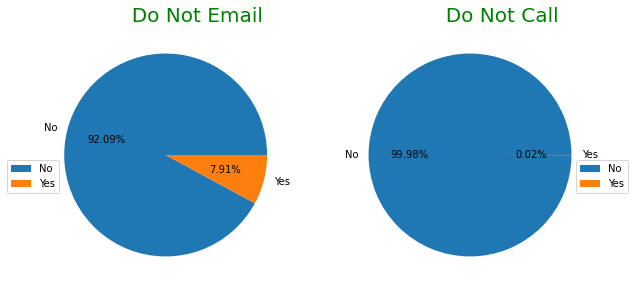

In [50]:
plt.figure(figsize=[10,20])
plt.subplot(1,2,1)
df["Do Not Email"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.title("          Do Not Email", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("")
plt.legend(labels = ['No','Yes'],bbox_to_anchor=(0.1, .5))


plt.subplot(1,2,2)
df["Do Not Call"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.title("          Do Not Call", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.ylabel("")
plt.legend(labels = ['No','Yes'],bbox_to_anchor=(.90, .5))
plt.show()


#### Observations(Do Not Email and Do Not Call):
    1.People do not prefer call.As it is evident from the graph above that 99% of the people do not prefer call.Only 0.02% prefer to be called
    
    2.92% of the people do not prefer email as well.Only 8% of people communicate through email

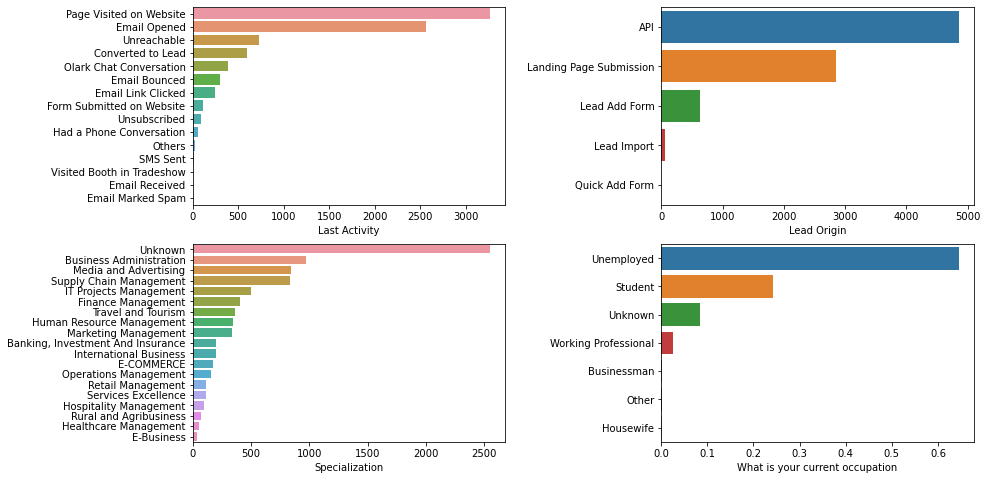

In [51]:
plt.figure(figsize=[14,8])
plt.subplots_adjust(wspace=0.5)

plt.subplot(2,2,1)
sns.barplot(x=df["Last Activity"].value_counts(),y=df["Last Activity"].unique())

plt.subplot(2,2,2)
sns.barplot(x=df["Lead Origin"].value_counts(),y=df["Lead Origin"].unique())

plt.subplot(2,2,3)
sns.barplot(x=df["Specialization"].value_counts(),y=df["Specialization"].unique())

plt.subplot(2,2,4)
sns.barplot(x=df["What is your current occupation"].value_counts(normalize=True),y=df["What is your current occupation"].unique())

plt.show()

#### Observations - Last Activity, Lead Origin, Specialization , What is your current occupation
1. Last Activity - Many have visited pages on the websites
2. Lead Origin - Most leads are through APIs
3. Specialization - Most searched and opted specialization is "Business Administration". Mostly people looking for course are not sure about which specializtion to opt for.
4. What is your current occupation - Approx 60% of the people are Unemployed.

In [52]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

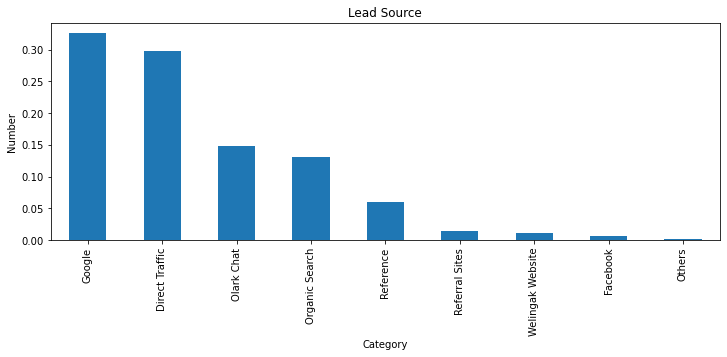

In [53]:
plt.figure(figsize=[12,4])
df["Lead Source"].value_counts(normalize=True).plot.bar()
plt.title("Lead Source")
plt.xlabel("Category")
plt.ylabel("Number")
plt.show()

#### Observation : Lead Source
1. More than 30% of people are gettng to know about this through "Google"

In [54]:
#For the features - 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations'
#Almost all the values are "No", so its better to drop them
cols_with_no = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations']
df.drop(inplace=True, axis=1,columns=cols_with_no)

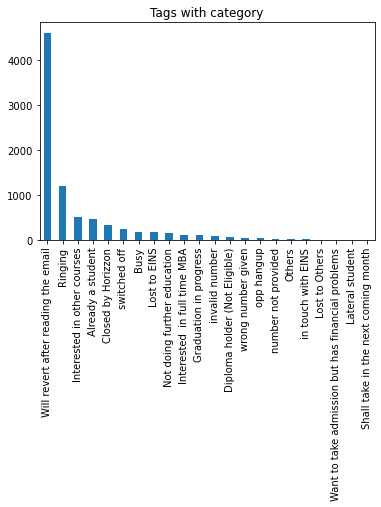

In [55]:
df['Tags'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title("Tags with category")
plt.show()

#### Observation :
1. More than 5000 people say "Will revert after reading the email" 

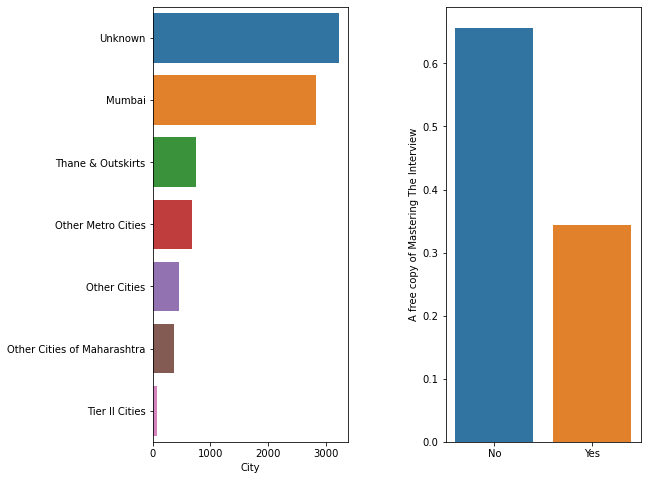

In [56]:
plt.figure(figsize=[14,8])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,3,1)
sns.barplot(x=df["City"].value_counts(),y=df["City"].unique())

plt.subplot(1,3,2)
sns.barplot(x=df["A free copy of Mastering The Interview"].unique(),y=df["A free copy of Mastering The Interview"].value_counts(normalize = True))


plt.show()

#### Observations: City and A free copy of Mastering The Interview
1. City - Mostly the people are from Mumbai and Thane/outskirts followed by other Metro cities
2. A free copy of Mastering The Interview -More than 65% of people Do not want copy of Mastering The Interview

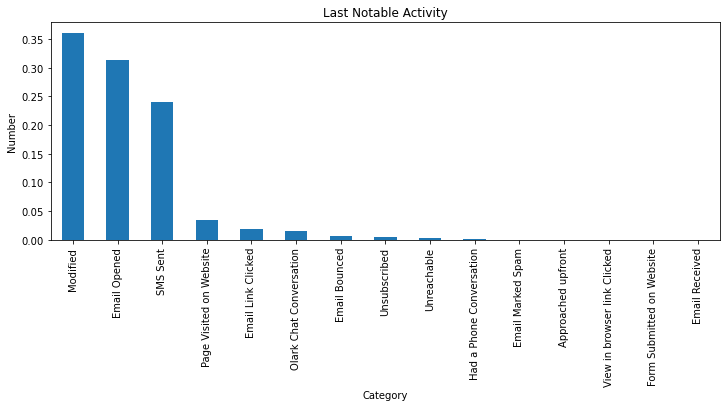

In [57]:
#'Last Notable Activity'
plt.figure(figsize=[12,4])
df["Last Notable Activity"].value_counts(normalize=True).plot.bar()
plt.title("Last Notable Activity")
plt.xlabel("Category")
plt.ylabel("Number")
plt.show()


#### Observation : Last Notable Activity
1. For 35% of customers last activity shows modified

__Outliers Check__
    
    'TotalVisits',
    'Total Time Spent on Website',
    'Page Views Per Visit', 



In [58]:
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8397.000000                  8397.000000           8397.000000
mean      3.658807                   515.961653              2.525802
std       4.944348                   552.346124              2.137611
min       0.000000                     0.000000              0.000000
25%       2.000000                    45.000000              1.000000
50%       3.000000                   277.000000              2.000000
75%       5.000000                   979.000000              3.500000
max     251.000000                  2272.000000             55.000000

In [59]:
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].quantile([0.10,0.20,0.40,0.70,0.80 , 0.90,.95])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
0.10          0.0                          0.0                   0.0
0.20          1.0                          3.0                   1.0
0.40          2.0                        176.0                   2.0
0.70          4.0                        802.2                   3.0
0.80          5.0                       1120.8                   4.0
0.90          7.0                       1399.4                   5.0
0.95         10.0                       1577.0                   6.0

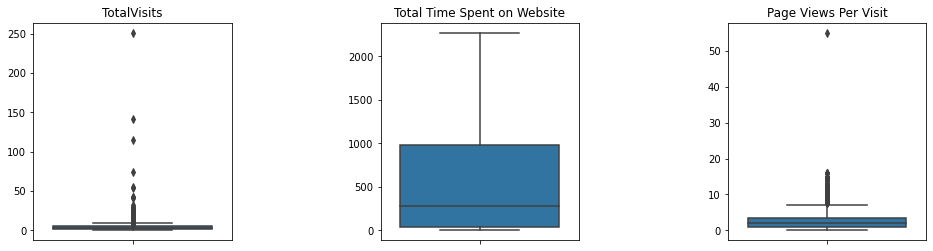

In [60]:
plt.figure(figsize=[16,4])
plt.subplots_adjust(wspace=0.75)
plt.subplot(1,3,1)
sns.boxplot(y=df["TotalVisits"],orient='h')
plt.title("TotalVisits")
plt.ylabel("")

plt.subplot(1,3,2)
sns.boxplot(y=df["Total Time Spent on Website"],orient='h')
plt.title("Total Time Spent on Website")
plt.ylabel("")

plt.subplot(1,3,3)
sns.boxplot(y=df["Page Views Per Visit"],orient='h')
plt.title("Page Views Per Visit")
plt.ylabel("")


plt.show()

#### Observations : 
Huge outliers are present in "TotalVisits" and "Page Views Per Visit"

In [61]:
#Remove the outliers for these 2 features for easy analysis
list_outliers=["TotalVisits","Page Views Per Visit"]
for val in list_outliers:
    Q1 = df[val].quantile(0.20)
    Q3 = df[val].quantile(0.90)
    IQR = Q3 - Q1
    df = df[(df[val] >= Q1 - 1.5*IQR) & (df[val] <= Q3 + 1.5*IQR)]

    
#Change
    
    
# q1=df["LotFrontage"].describe()["25%"]
# q3=df["LotFrontage"].describe()["75%"]
# iqr=q3-q1
# lower_bound=q1-1.5*iqr
# upper_bound=q3+1.5*iqr
# print(lower_bound,upper_bound)

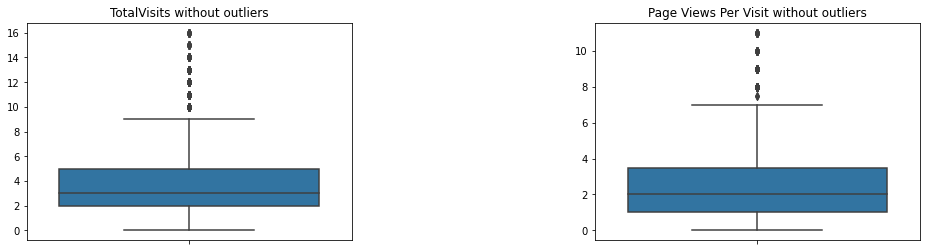

In [62]:
plt.figure(figsize=[16,4])
plt.subplots_adjust(wspace=0.75)
plt.subplot(1,2,1)
sns.boxplot(y=df["TotalVisits"],orient='h')
plt.title("TotalVisits without outliers")
plt.ylabel("")

plt.subplot(1,2,2)
sns.boxplot(y=df["Page Views Per Visit"],orient='h')
plt.title("Page Views Per Visit without outliers")
plt.ylabel("")


plt.show()

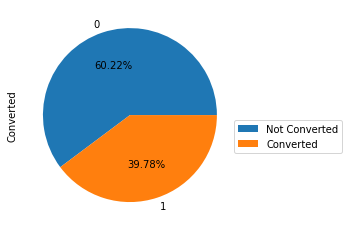

In [63]:
#Converted
df["Converted"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend(labels = ['Not Converted','Converted'],bbox_to_anchor=(1.5, .5))
plt.show()

#### Observation:

39% is converted

### Bivariate Analysis


__Converted Vs City__

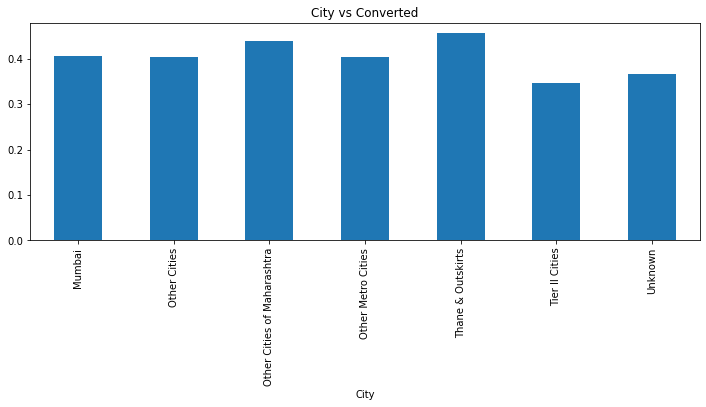

In [64]:
plt.figure(figsize=[12,4])
df.groupby("City")["Converted"].mean().plot.bar()
plt.title("City vs Converted")
plt.show()

#### Observation : Mostly the CONVERSIONS  are from Thane and Other Cities of Maharastra

__Converted Vs Specialization__

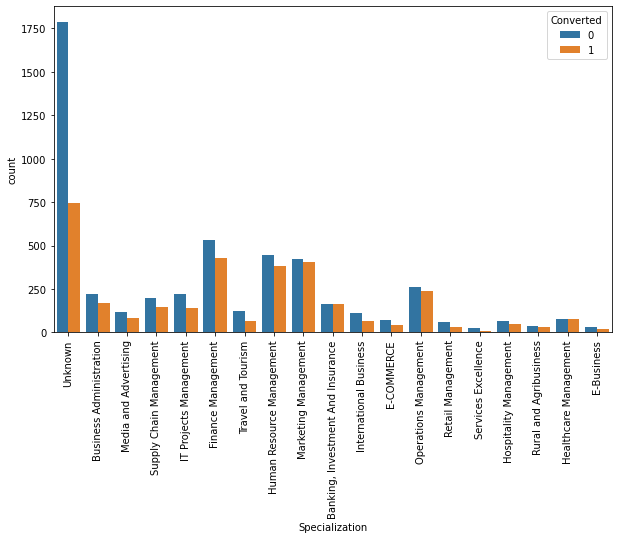

In [65]:
plt.figure(figsize=[10,6])
sns.countplot(x= "Specialization", hue = 'Converted', data = df)
plt.xticks(rotation=90)
plt.show()

#### Observation :
Conversion are from "Marketing/Finance/Human Resource Management"

Many Specialization are Unknow" and conversion happends from there

__Converted Vs Do Not Email__

__Converted Vs Do Not Call__

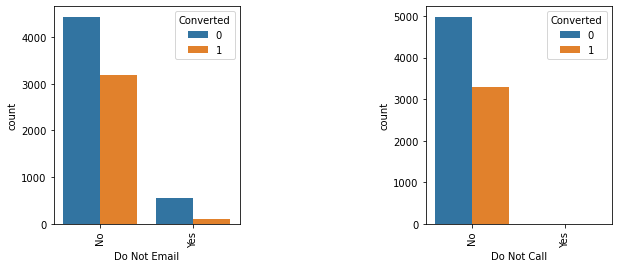

In [66]:
plt.figure(figsize=[10,4])
plt.subplots_adjust(wspace=1)
plt.subplot(1,2,1)
sns.countplot(x= "Do Not Email", hue = 'Converted', data = df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x= "Do Not Call", hue = 'Converted', data = df)
plt.xticks(rotation=90)

plt.show()

#### Observation :
1. Almost no conversion is observed if "Do Not Call" is set to "Yes".
2. Very less conversion is observed if "Do Not Email" is set to "Yes".

__Converted Vs Lead Source__

__Converted Vs What is your current occupation__

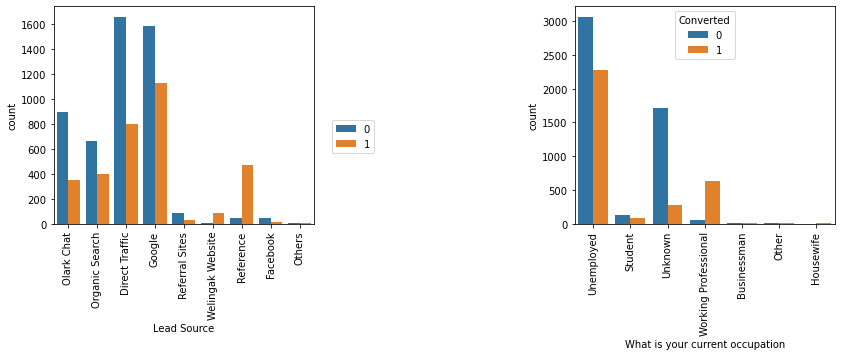

In [67]:
plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=1)

plt.subplot(1,2,1)
sns.countplot(x= "Lead Source", hue = 'Converted', data = df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.25, .5),labels = ['0','1'])


plt.subplot(1,2,2)
sns.countplot(x= "What is your current occupation", hue = 'Converted', data = df)
plt.xticks(rotation=90)

plt.show()

#### Observation : 
1. Most reliable conversion happens when the lead source is Google and Direct Traffic
2. Highest conversion is of Unemployed and Working Professional

__Lead Origin Vs Converted__

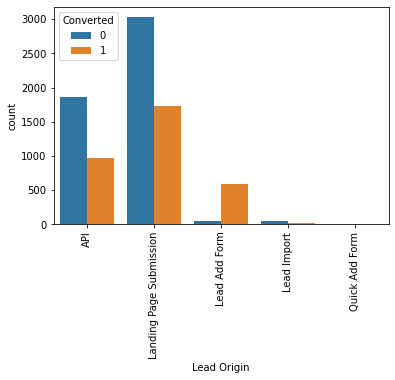

In [68]:
sns.countplot(x= "Lead Origin", hue = 'Converted', data = df,)
plt.xticks(rotation=90)
plt.show()

#### Observation : 

Conversion are higher if Lead Origin is "Landing Page Submission" or "API"

__Converted Vs 'Last Activity'__

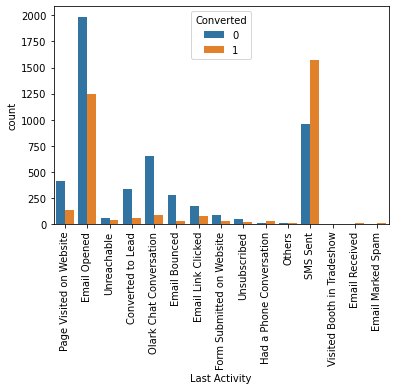

In [69]:
sns.countplot(x= "Last Activity", hue = 'Converted', data = df,)
plt.xticks(rotation=90)
plt.show()

#### Observation :

1.Conversion rate is highest if Last Activity is "SMS Sent" followed by "Email Opened"

__Converted Vs Tags__

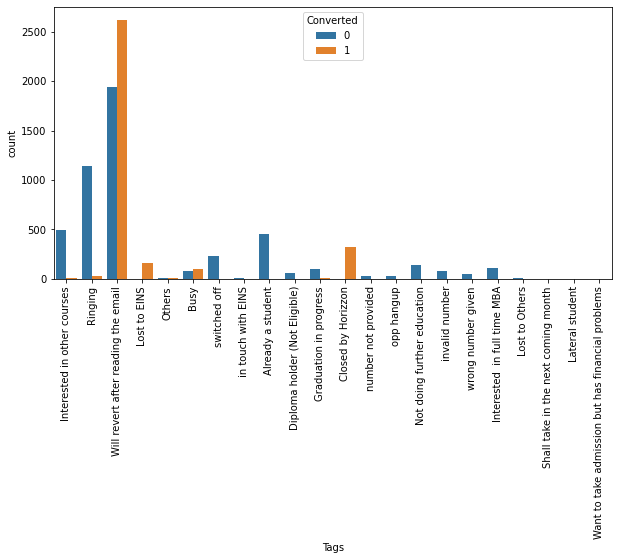

In [70]:
plt.figure(figsize=[10,5])
sns.countplot(x= "Tags", hue = 'Converted', data = df)
plt.xticks(rotation=90)
plt.show()

#### Observations:
1. Tags with "Will revert after reading the email" has the highest conversions

In [71]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Multivariate Analysis - Converted, Specialization and City

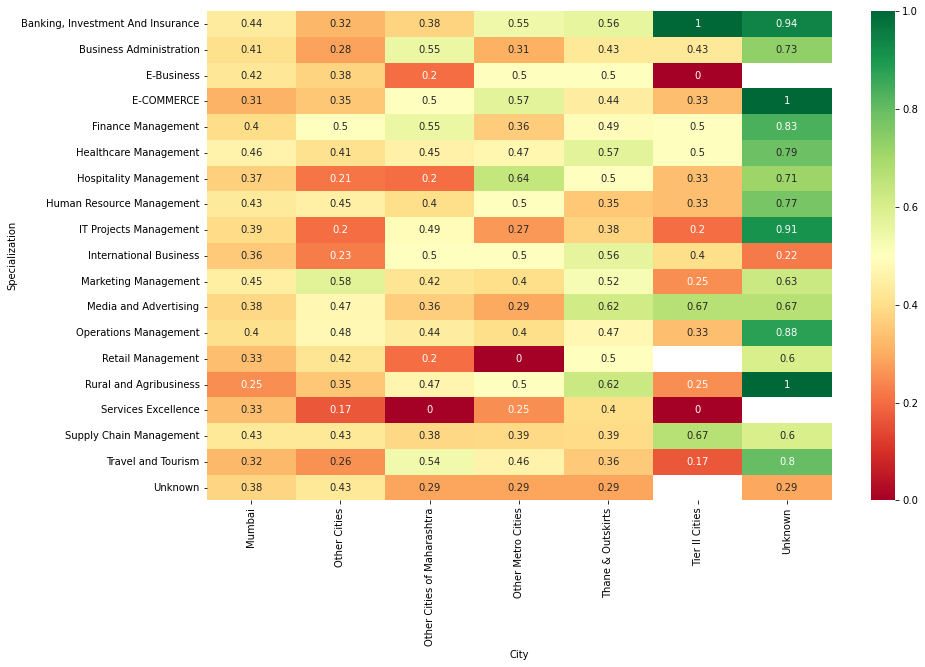

In [72]:
plt.figure(figsize=[14,9])
result = pd.pivot_table(data=df,index="Specialization",columns='City',values="Converted")
sns.heatmap(result,annot=True,cmap="RdYlGn")
plt.show()

#### Observations : 
1. Conversions are high for Unknown cities
2. Conversion are good in cities like Thane and Outskirts in the field of "Rural AgriBusiness", "Media and Advertising" and "Healthcare Management"

#### Multivariate Analysis - Numerical variables

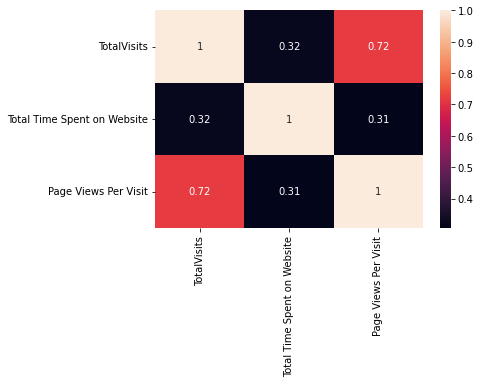

In [73]:
sns.heatmap(df[["TotalVisits",'Total Time Spent on Website',"Page Views Per Visit"]].corr(), annot=True)
plt.show()

#### Observations : 
TotalVisits and Page Views Per Visit have high correlation

### 3. Data Preparation

__Create Dummy variables for categorical variables__

In [74]:
df.shape

(8275, 17)

In [75]:
dummies_df = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","City",
                 "Do Not Email","Do Not Call","Tags","Last Notable Activity"]], drop_first=True)
dummies_df.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
0                           0                             0   
1                           1                             0   
2                           1                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Las

In [76]:
dummies_df.shape

(8275, 93)

In [77]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
#Dropping the variables for which dummies are created
df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","City",
                 "Do Not Email","Do Not Call","Tags","Last Notable Activity"],inplace=True,axis = 1)

In [79]:
df.shape

(8275, 7)

In [80]:
df = pd.concat([df,dummies_df],axis=1)

In [81]:
df.shape

(8275, 100)

In [82]:
df["A free copy of Mastering The Interview"].value_counts()

No     5470
Yes    2805
Name: A free copy of Mastering The Interview, dtype: int64

In [83]:
#drop it for modelling data.Not adding much significance

In [84]:
df.drop("A free copy of Mastering The Interview",axis = 1, inplace=True)

In [85]:
#All the features are numeric except Prospect Id.Drop it for modelling
df.drop(inplace=True,axis = 1, columns="Prospect ID")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8275 entries, 0 to 9239
Data columns (total 98 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Lead Number                                             8275 non-null   int64  
 1   Converted                                               8275 non-null   int64  
 2   TotalVisits                                             8275 non-null   float64
 3   Total Time Spent on Website                             8275 non-null   int64  
 4   Page Views Per Visit                                    8275 non-null   float64
 5   Lead Origin_Landing Page Submission                     8275 non-null   uint8  
 6   Lead Origin_Lead Add Form                               8275 non-null   uint8  
 7   Lead Origin_Lead Import                                 8275 non-null   uint8  
 8   Lead Origin_Quick Add Form            

__Observation :__ 

All are numeric value so good to start with the modelling

In [87]:
df.shape

(8275, 98)

__Test and train Split__

In [88]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [89]:
print(df_train.shape)
print(df_test.shape)

(5792, 98)
(2483, 98)


__Scaling the data__

In [90]:
df.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   0   
3                           0                     0                   0   
4                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
0                           0                             0   
1                           1                             0   
2                           1                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                

In [91]:
scaler = MinMaxScaler()

In [92]:
# Apply scaler() to [TotalVisits, Total Time Spent on Website,Total Time Spent on Website]
num_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [93]:
df_train.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    5792.000000  5792.000000  5792.000000                  5792.000000   
mean   617438.858943     0.397963     0.210085                     0.225584   
std     24118.076866     0.489520     0.180770                     0.241835   
min    579538.000000     0.000000     0.000000                     0.000000   
25%    595315.000000     0.000000     0.125000                     0.018486   
50%    615761.500000     0.000000     0.187500                     0.121919   
75%    639314.000000     1.000000     0.312500                     0.424846   
max    660737.000000     1.000000     1.000000                     1.000000   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           5792.000000                          5792.000000   
mean               0.222409                             0.572859   
std                0.174684                             0.494706   
min                0.000000                             0.000000   
25%                0.090909                             0.000000   
50%                0.181818                             1.000000   
75%                0.318182                             1.000000   
max                1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                5792.000000              5792.000000   
mean                    0.078039                 0.006906   
std                     0.268256                 0.082823   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
count                 5792.000000           5792.000000         5792.000000   
mean                     0.000173              0.006906            0.322686   
std                      0.013140              0.082823            0.467544   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      0.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count             5792.000000                 5792.000000         5792.000000   
mean                 0.151416                    0.131733            0.002762   
std                  0.358485                    0.338230            0.052491   
min                  0.000000                    0.000000            0.000000   
25%                  0.000000                    0.000000            0.000000   
50%                  0.000000                    0.000000            0.000000   
75%                  0.000000                    0.000000            0.000000   
max                  1.000000                    1.000000            1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            5792.000000                 5792.000000   
mean                0.062155                    0.013985   
std                 0.241457                    0.117438   
min                 0.000000                    0.000000   
25%                 0.000000                    0.000000   
50%                 0.000000                    0.000000   
75%                 0.000000                    0.000000   
max                 1.000000                    1.000000   

       Lead Source_Welingak Website  Last Activity_Email Bounced  \
count                   5792.000000                  5792.000000   
mean           

__Dividing in X and Y sets for model bulding and testing__

In [94]:

X_train = df_train

y_train = df_train.pop('Converted')

In [95]:
print(X_train.shape)
print(y_train.shape)

(5792, 97)
(5792,)


In [96]:
X_train.corr()

Lead Number  TotalVisits  \
Lead Number                                            1.000000     0.045106   
TotalVisits                                            0.045106     1.000000   
Total Time Spent on Website                            0.013284     0.318548   
Page Views Per Visit                                   0.057838     0.702920   
Lead Origin_Landing Page Submission                   -0.076883     0.397054   
Lead Origin_Lead Add Form                              0.049760    -0.274271   
Lead Origin_Lead Import                                0.107682    -0.057996   
Lead Origin_Quick Add Form                             0.009361    -0.001642   
Lead Source_Facebook                                   0.104409    -0.055113   
Lead Source_Google                                     0.137854     0.183067   
Lead Source_Olark Chat                                -0.078941    -0.432668   
Lead Source_Organic Search                            -0.025672     0.277889   
Lead Source_Others                                     0.014196     0.001386   
Lead Source_Reference                                  0.039940    -0.244813   
Lead Source_Referral Sites                             0.165995     0.076120   
Lead Source_Welingak Website                           0.033328    -0.102846   
Last Activity_Email Bounced                           -0.047363    -0.062002   
Last Activity_Email Link Clicked                       0.020165    -0.025902   
Last Activity_Email Marked Spam                       -0.025975     0.004104   
Last Activity_Email Opened                             0.107759     0.055895   
Last Activity_Email Received                          -0.021777     0.013744   
Last Activity_Form Submitted on Website                0.021638     0.014880   
Last Activity_Had a Phone Conversation                -0.000458     0.004798   
Last Activity_Olark Chat Conversation                 -0.000495    -0.175725   
Last Activity_Others                                   0.023578     0.004870   
Last Activity_Page Visited on Website                  0.018264     0.224691   
Last Activity_SMS Sent                                -0.139886     0.000115   
Last Activity_Unreachable                              0.076245     0.019128   
Last Activity_Unsubscribed                            -0.020669     0.016459   
Last Activity_Visited Booth in Tradeshow                    NaN          NaN   
Specialization_Business Administration                -0.006036     0.044584   
Specialization_E-Business                              0.003177     0.025909   
Specialization_E-COMMERCE                             -0.004099     0.034433   
Specialization_Finance Management                     -0.005629     0.072831   
Specialization_Healthcare Management                   0.008422     0.032340   
Specialization_Hospitality Management                  0.006672     0.032540   
Specialization_Human Resource Management              -0.020086     0.062963   
Specialization_IT Projects Management                 -0.029330     0.041722   
Specialization_International Business                 -0.006835     0.046712   
Specialization_Marketing Management                   -0.003530     0.028052   
Specialization_Media and Advertising                   0.000417     0.071721   
Specialization_Operations Management                  -0.014763     0.040987   
Specialization_Retail Management                      -0.009526     0.017292   
Specialization_Rural and Agribusiness                  0.030221     0.036693   
Specialization_Services Excellence                    -0.011918     0.012994   
Specialization_Supply Chain Management                -0.025479     0.057135   
Specialization_Travel and Tourism                     -0.013226     0.085964   
Specialization_Unknown                                 0.059012    -0.326868   
What is your current occupation_Housewife             -0.017611    -0.007783   
What is your current occupation_Other               

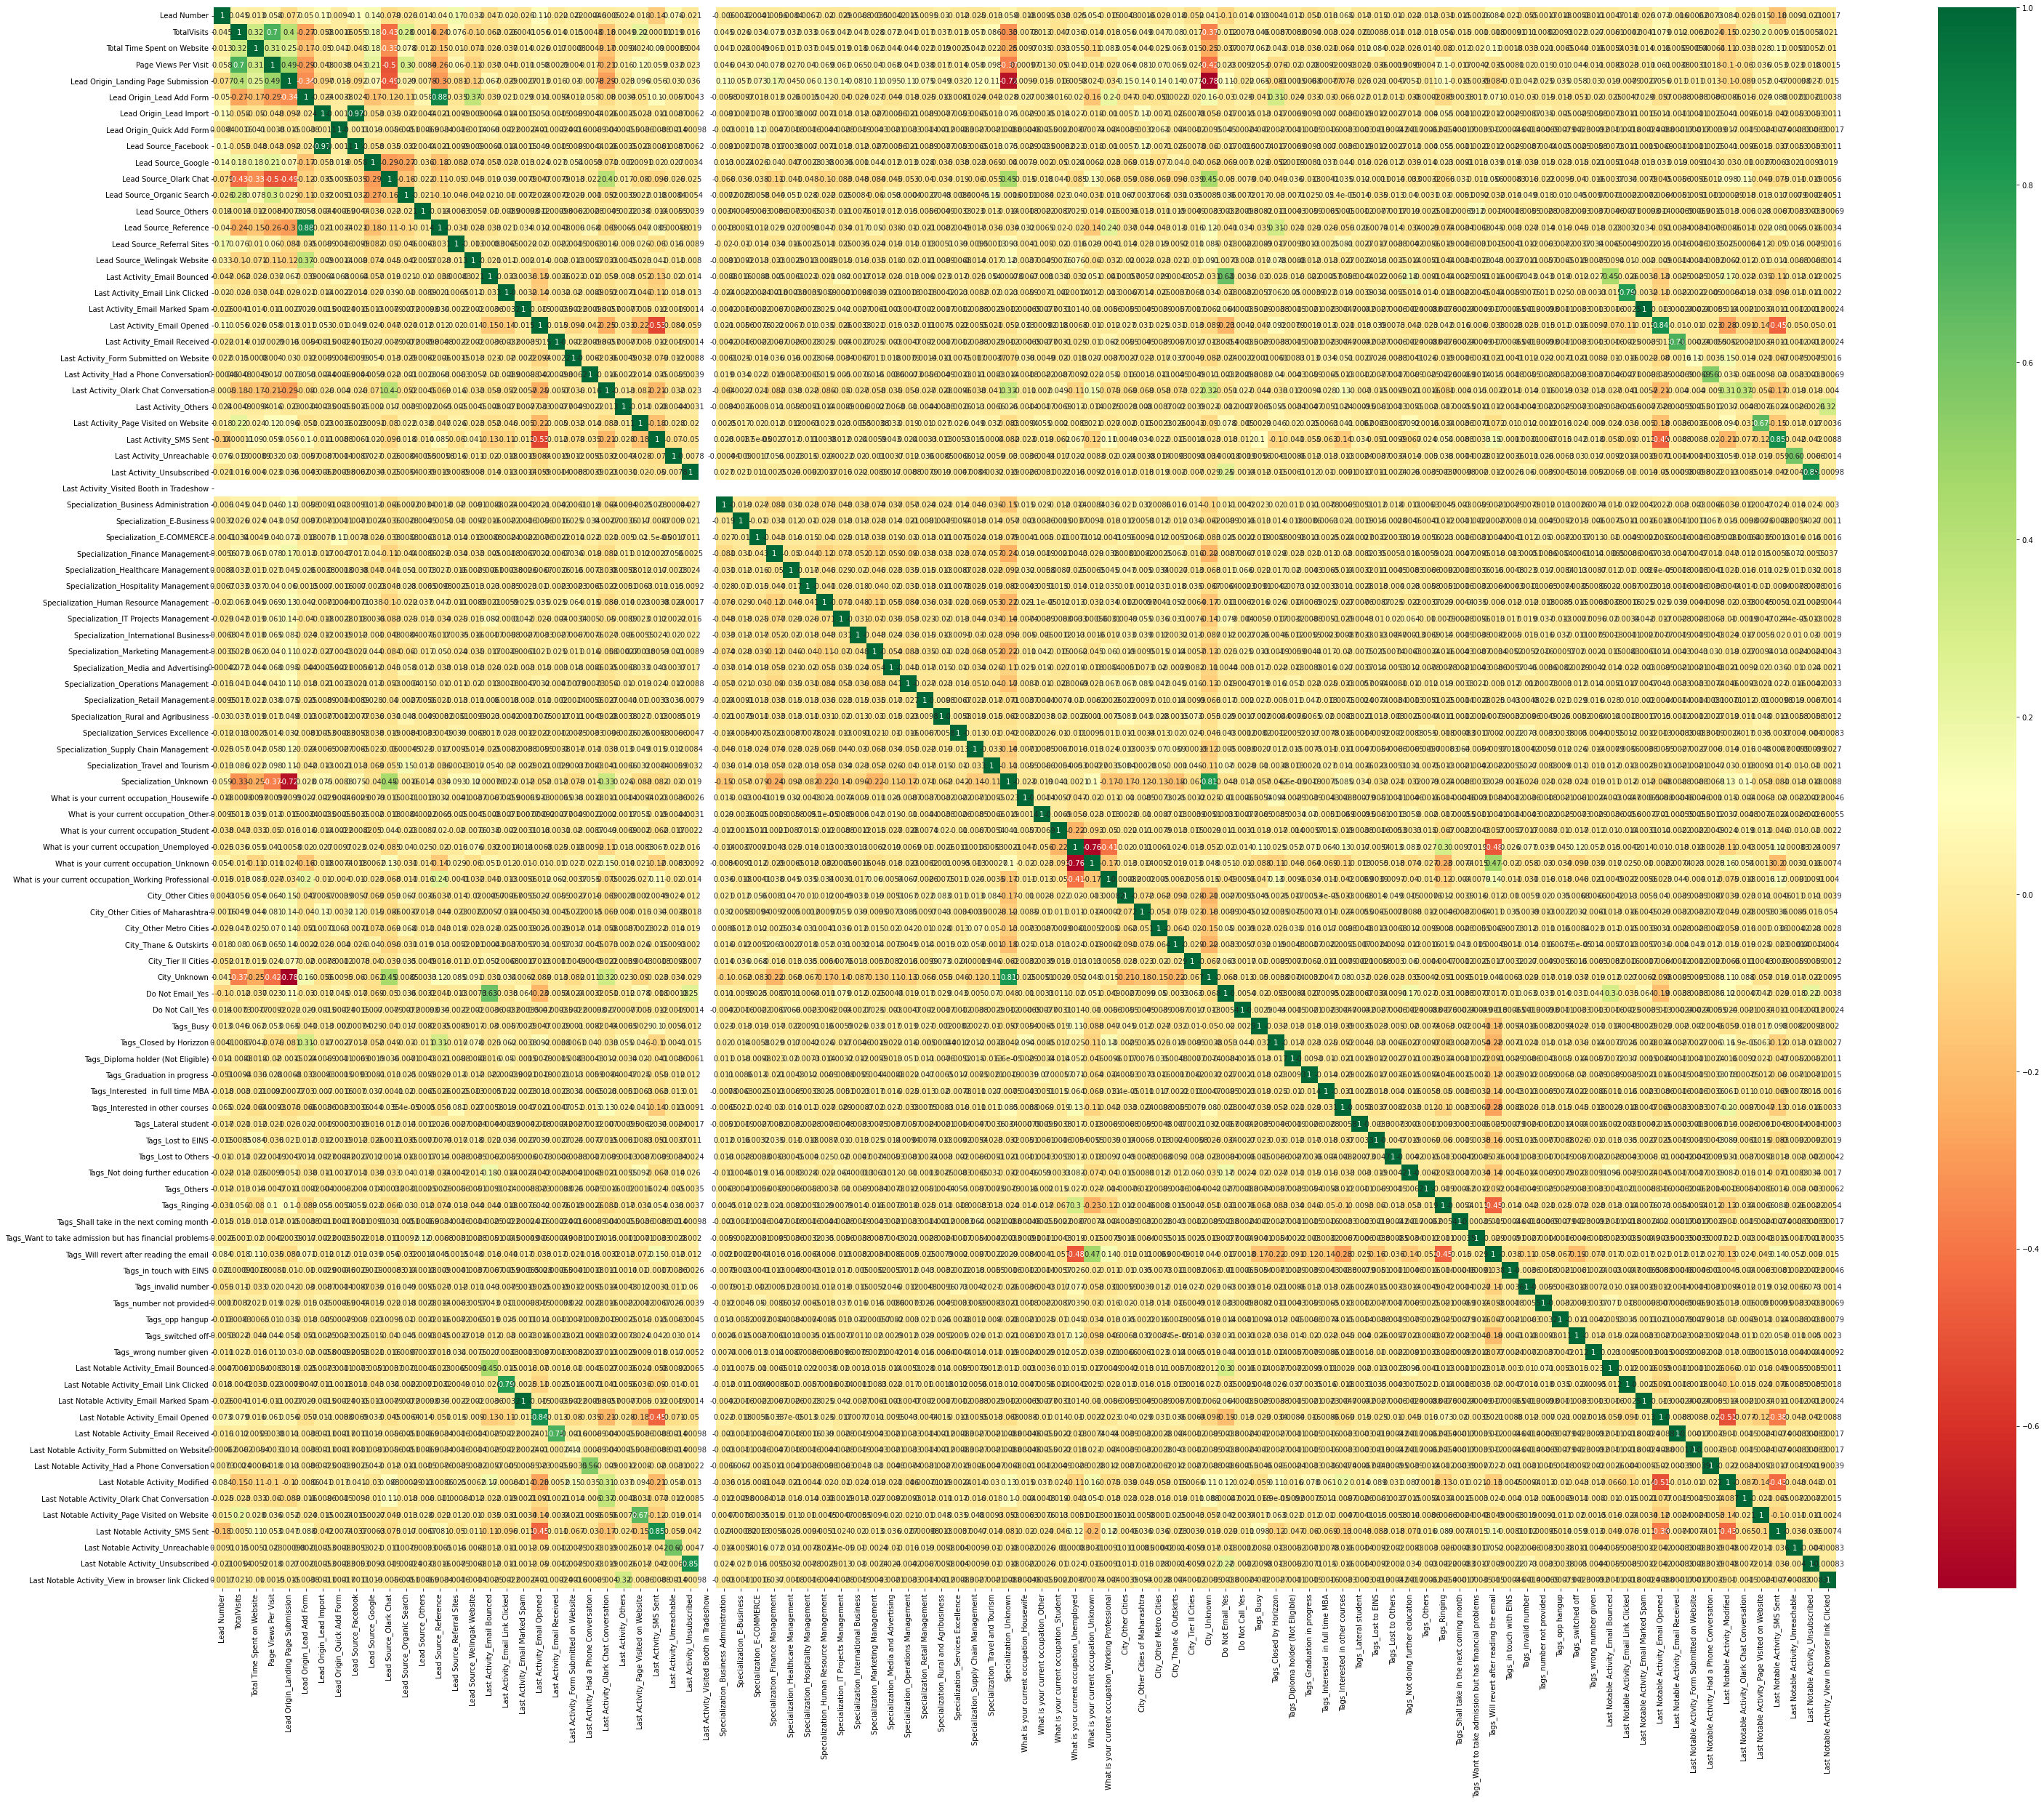

In [97]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50,40))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Observation : 

Lets try to evaluate feature variables based on RFE as there are many variables

### 4. Modelling

__RFE to perform variable selection__

In [98]:
lm = LogisticRegression()

lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Origin_Quick Add Form', False, 76),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Others', False, 65),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Welingak Website', False, 15),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Marked Spam', False, 69),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Email Received', False, 67),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Had a Phone Conversation', False, 60),
 ('Last Activity_Olar

In [99]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [100]:
X_train = X_train[col]

In [101]:
X_train.columns

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

**Model 1**

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logistic_model_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5792
Model:                            GLM   Df Residuals:                     5776
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1639.7
Date:                Tue, 21 Mar 2023   Deviance:                       3279.4
Time:                        14:25:10   Pearson chi2:                 8.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5408
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0130      1.201     -2.508      0.012      -5.367      -0.659
Lead Number                                           2.922e-06   1.93e-06      1.513      0.130   -8.63e-07    6.71e-06
Total Time Spent on Website                              4.0306      0.198     20.403      0.000       3.643       4.418
Lead Origin_Landing Page Submission                     -1.1868      0.152     -7.807      0.000      -1.485      -0.889
Lead Origin_Lead Add Form                                3.1598      0.546      5.791      0.000       2.090       4.229
Lead Source_Reference                                   -0.2447      0.600     -0.408      0.683      -1.421       0.932
Last Activity_Olark Chat Conversation                   -0.5620      0.216     -2.603      0.009      -0.985      -0.139
Last Activity_SMS Sent                                   0.8180      0.181      4.530      0.000       0.464       1.172
Specialization_Unknown                                  -0.9769      0.157     -6.237      0.000      -1.284      -0.670
What is your current occupation_Unknown                 -2.9720      0.124    -23.898      0.000      -3.216      -2.728
What is your current occupation_Working Professional     1.5223      0.232      6.576      0.000       1.069       1.976
Tags_Interested in other courses                        -2.9867      0.416     -7.179      0.000      -3.802      -2.171
Tags_Ringing                                            -3.3875      0.251    -13.522      0.000      -3.879      -2.897
Tags_Will revert after reading the email                 2.3979      0.114     21.074      0.000       2.175       2.621
Last Notable Activity_Modified                          -0.3761      0.115     -3.259      0.001      -0.602      -0.150
Last Notable Activity_SMS Sent                           0.7685      0.218      3.527      0.000       0.341       1.195
========================================================================================================================
"""

In [103]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                         Lead Number  15.67
2                 Lead Origin_Landing Page Submission   6.49
14                     Last Notable Activity_SMS Sent   6.40
6                              Last Activity_SMS Sent   6.08
3                           Lead Origin_Lead Add Form   5.37
4                               Lead Source_Reference   5.20
12           Tags_Will revert after reading the email   4.67
7                              Specialization_Unknown   3.70
13                     Last Notable Activity_Modified   2.56
1                         Total Time Spent on Website   2.23
8             What is your current occupation_Unknown   2.23
11                                       Tags_Ringing   1.68
5               Last Activity_Olark Chat Conversation   1.46
9   What is your current occupation_Working Profes...   1.30
10                   Tags_Interested in other courses   1.30

In [104]:
X_train[col]

Lead Number  Total Time Spent on Website  \
4353       617975                     0.548415   
561        654469                     0.722271   
1618       643401                     0.000000   
647        653849                     0.137324   
4435       617125                     0.033891   
...           ...                          ...   
358        656594                     0.000000   
81         659705                     0.152289   
9002       581353                     0.481514   
7879       589390                     0.000000   
6471       600274                     0.143486   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4353                                    1                          0   
561                                     0                          0   
1618                                    0                          1   
647                                     1                          0   
4435                                    1                          0   
...                                   ...                        ...   
358                                     0                          0   
81                                      0                          1   
9002                                    1                          0   
7879                                    0                          0   
6471                                    1                          0   

      Lead Source_Reference  Last Activity_Olark Chat Conversation  \
4353                      0                                      0   
561                       0                                      0   
1618                      0                                      0   
647                       0                                      0   
4435                      0                                      0   
...                     ...                                    ...   
358                       0                                      0   
81                        0                                      0   
9002                      0                                      0   
7879                      0                                      0   
6471                      0                                      0   

      Last Activity_SMS Sent  Specialization_Unknown  \
4353                       1                       0   
561                        1                       1   
1618                       1                       1   
647                        0                       0   
4435                       0                       1   
...                      ...                     ...   
358                        0                       0   
81                         0                       1   
9002                       0                       0   
7879                       0                       1   
6471                       1                       0   

      What is your current occupation_Unknown  \
4353                                        0   
561                                         0   
1618                                        0   
647                                         0   
4435                                        0   
...                                       ...   
358                                         0   
81                                          0   
9002                                        1   
7879                                        0   
6471                                        0   

      What is your current occupation_Working Professional  \
4353                                                  0      
561                                                   0      
1618                                                  0      
647                                                   0      
4435                                                  0      
...                                                 ...      
358

_dropping Lead Source_Reference as it has high p-value_

In [105]:
X_train.drop(inplace=True,columns="Lead Source_Reference", axis = 1)

In [106]:
X_train.shape

(5792, 14)

**Model 2**

In [107]:
X_train_sm = sm.add_constant(X_train)
logistic_model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5792
Model:                            GLM   Df Residuals:                     5777
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1639.8
Date:                Tue, 21 Mar 2023   Deviance:                       3279.6
Time:                        14:25:16   Pearson chi2:                 8.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5407
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0158      1.201     -2.511      0.012      -5.370      -0.662
Lead Number                                           2.919e-06   1.93e-06      1.511      0.131   -8.66e-07     6.7e-06
Total Time Spent on Website                              4.0316      0.198     20.404      0.000       3.644       4.419
Lead Origin_Landing Page Submission                     -1.1821      0.152     -7.800      0.000      -1.479      -0.885
Lead Origin_Lead Add Form                                2.9665      0.256     11.593      0.000       2.465       3.468
Last Activity_Olark Chat Conversation                   -0.5628      0.216     -2.606      0.009      -0.986      -0.140
Last Activity_SMS Sent                                   0.8233      0.180      4.575      0.000       0.471       1.176
Specialization_Unknown                                  -0.9703      0.156     -6.229      0.000      -1.276      -0.665
What is your current occupation_Unknown                 -2.9737      0.124    -23.924      0.000      -3.217      -2.730
What is your current occupation_Working Professional     1.5188      0.231      6.561      0.000       1.065       1.972
Tags_Interested in other courses                        -2.9903      0.416     -7.182      0.000      -3.806      -2.174
Tags_Ringing                                            -3.3935      0.250    -13.549      0.000      -3.884      -2.903
Tags_Will revert after reading the email                 2.3987      0.114     21.092      0.000       2.176       2.622
Last Notable Activity_Modified                          -0.3768      0.115     -3.265      0.001      -0.603      -0.151
Last Notable Activity_SMS Sent                           0.7627      0.217      3.510      0.000       0.337       1.189
========================================================================================================================
"""

In [108]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                         Lead Number  15.44
13                     Last Notable Activity_SMS Sent   6.39
2                 Lead Origin_Landing Page Submission   6.37
5                              Last Activity_SMS Sent   6.08
11           Tags_Will revert after reading the email   4.64
6                              Specialization_Unknown   3.59
12                     Last Notable Activity_Modified   2.56
1                         Total Time Spent on Website   2.23
7             What is your current occupation_Unknown   2.22
10                                       Tags_Ringing   1.68
3                           Lead Origin_Lead Add Form   1.52
4               Last Activity_Olark Chat Conversation   1.46
9                    Tags_Interested in other courses   1.30
8   What is your current occupation_Working Profes...   1.29

_Dropping Lead Number as it has high p value and high VIF_

In [109]:
X_train.drop(inplace=True,columns="Lead Number", axis = 1)

In [110]:
X_train.shape

(5792, 13)

__Model 3__

In [111]:
X_train_sm = sm.add_constant(X_train)
logistic_model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5792
Model:                            GLM   Df Residuals:                     5778
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.9
Date:                Tue, 21 Mar 2023   Deviance:                       3281.8
Time:                        14:25:17   Pearson chi2:                 8.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5406
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2186      0.165     -7.389      0.000      -1.542      -0.895
Total Time Spent on Website                              4.0337      0.197     20.424      0.000       3.647       4.421
Lead Origin_Landing Page Submission                     -1.1882      0.152     -7.841      0.000      -1.485      -0.891
Lead Origin_Lead Add Form                                2.9815      0.255     11.693      0.000       2.482       3.481
Last Activity_Olark Chat Conversation                   -0.5681      0.216     -2.636      0.008      -0.991      -0.146
Last Activity_SMS Sent                                   0.8270      0.180      4.597      0.000       0.474       1.180
Specialization_Unknown                                  -0.9718      0.156     -6.239      0.000      -1.277      -0.667
What is your current occupation_Unknown                 -2.9793      0.124    -23.956      0.000      -3.223      -2.736
What is your current occupation_Working Professional     1.5073      0.231      6.520      0.000       1.054       1.960
Tags_Interested in other courses                        -2.9591      0.415     -7.124      0.000      -3.773      -2.145
Tags_Ringing                                            -3.3947      0.251    -13.526      0.000      -3.887      -2.903
Tags_Will revert after reading the email                 2.4223      0.113     21.481      0.000       2.201       2.643
Last Notable Activity_Modified                          -0.3765      0.115     -3.265      0.001      -0.602      -0.150
Last Notable Activity_SMS Sent                           0.7270      0.216      3.368      0.001       0.304       1.150
========================================================================================================================
"""

In [112]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                     Last Notable Activity_SMS Sent  6.35
4                              Last Activity_SMS Sent  6.07
10           Tags_Will revert after reading the email  3.89
1                 Lead Origin_Landing Page Submission  3.12
11                     Last Notable Activity_Modified  2.37
6             What is your current occupation_Unknown  2.22
5                              Specialization_Unknown  2.14
0                         Total Time Spent on Website  2.09
9                                        Tags_Ringing  1.49
3               Last Activity_Olark Chat Conversation  1.45
2                           Lead Origin_Lead Add Form  1.27
7   What is your current occupation_Working Profes...  1.26
8                    Tags_Interested in other courses  1.22

_Drop Last Activity_Olark Chat Conversation with high p-value_

In [113]:
X_train.drop(inplace=True,columns="Last Activity_Olark Chat Conversation", axis = 1)

In [114]:
X_train.shape

(5792, 12)

__Model 4__

In [115]:
X_train_sm = sm.add_constant(X_train)
logistic_model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_model_4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5792
Model:                            GLM   Df Residuals:                     5779
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1644.5
Date:                Tue, 21 Mar 2023   Deviance:                       3289.1
Time:                        14:25:18   Pearson chi2:                 8.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5400
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2545      0.165     -7.625      0.000      -1.577      -0.932
Total Time Spent on Website                              4.0565      0.197     20.547      0.000       3.670       4.443
Lead Origin_Landing Page Submission                     -1.1455      0.151     -7.594      0.000      -1.441      -0.850
Lead Origin_Lead Add Form                                3.0566      0.254     12.049      0.000       2.559       3.554
Last Activity_SMS Sent                                   0.9236      0.177      5.222      0.000       0.577       1.270
Specialization_Unknown                                  -1.0065      0.155     -6.481      0.000      -1.311      -0.702
What is your current occupation_Unknown                 -2.9905      0.124    -24.073      0.000      -3.234      -2.747
What is your current occupation_Working Professional     1.5254      0.232      6.587      0.000       1.072       1.979
Tags_Interested in other courses                        -2.9652      0.415     -7.153      0.000      -3.778      -2.153
Tags_Ringing                                            -3.3985      0.251    -13.524      0.000      -3.891      -2.906
Tags_Will revert after reading the email                 2.4165      0.113     21.464      0.000       2.196       2.637
Last Notable Activity_Modified                          -0.4572      0.112     -4.093      0.000      -0.676      -0.238
Last Notable Activity_SMS Sent                           0.6414      0.214      3.001      0.003       0.222       1.060
========================================================================================================================
"""

In [116]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                     Last Notable Activity_SMS Sent  6.15
3                              Last Activity_SMS Sent  5.82
9            Tags_Will revert after reading the email  3.88
1                 Lead Origin_Landing Page Submission  3.10
5             What is your current occupation_Unknown  2.21
10                     Last Notable Activity_Modified  2.13
0                         Total Time Spent on Website  2.08
4                              Specialization_Unknown  2.05
8                                        Tags_Ringing  1.49
2                           Lead Origin_Lead Add Form  1.26
6   What is your current occupation_Working Profes...  1.26
7                    Tags_Interested in other courses  1.22

_Drop "Last Notable Activity_SMS Sent" with high VIF and p-value_

In [117]:
X_train.drop(inplace=True, axis = 1,columns="Last Notable Activity_SMS Sent")

In [118]:
X_train.shape

(5792, 11)

__Model 5__

In [119]:
X_train_sm = sm.add_constant(X_train)
logistic_model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_model_5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5792
Model:                            GLM   Df Residuals:                     5780
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1649.1
Date:                Tue, 21 Mar 2023   Deviance:                       3298.2
Time:                        14:25:20   Pearson chi2:                 8.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5393
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1820      0.163     -7.266      0.000      -1.501      -0.863
Total Time Spent on Website                              4.0593      0.197     20.576      0.000       3.673       4.446
Lead Origin_Landing Page Submission                     -1.1425      0.151     -7.559      0.000      -1.439      -0.846
Lead Origin_Lead Add Form                                3.0544      0.255     11.985      0.000       2.555       3.554
Last Activity_SMS Sent                                   1.3586      0.100     13.551      0.000       1.162       1.555
Specialization_Unknown                                  -1.0029      0.156     -6.442      0.000      -1.308      -0.698
What is your current occupation_Unknown                 -3.0261      0.124    -24.462      0.000      -3.269      -2.784
What is your current occupation_Working Professional     1.5234      0.231      6.587      0.000       1.070       1.977
Tags_Interested in other courses                        -2.9594      0.414     -7.143      0.000      -3.772      -2.147
Tags_Ringing                                            -3.3374      0.249    -13.411      0.000      -3.825      -2.850
Tags_Will revert after reading the email                 2.4128      0.112     21.470      0.000       2.193       2.633
Last Notable Activity_Modified                          -0.6323      0.096     -6.579      0.000      -0.821      -0.444
========================================================================================================================
"""

In [120]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9            Tags_Will revert after reading the email  3.85
1                 Lead Origin_Landing Page Submission  3.06
5             What is your current occupation_Unknown  2.17
0                         Total Time Spent on Website  2.08
4                              Specialization_Unknown  2.00
10                     Last Notable Activity_Modified  1.71
3                              Last Activity_SMS Sent  1.62
8                                        Tags_Ringing  1.48
2                           Lead Origin_Lead Add Form  1.26
6   What is your current occupation_Working Profes...  1.26
7                    Tags_Interested in other courses  1.21

**Observation:**

The p-value(less than 0.05) and VIF(less than 5) for all the features looks ok in the last model.

#### Prediction on train set

In [121]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

4353    0.975233
561     0.184513
1618    0.982166
647     0.656059
4435    0.314975
2560    0.980390
2637    0.004251
9037    0.472132
7899    0.830130
5672    0.027766
dtype: float64

In [122]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
4353          1         0.975233
561           0         0.184513
1618          0         0.982166
647           1         0.656059
4435          0         0.314975

**Fix the cutoff as 0.50 and assign the Predicted values**

In [123]:
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Prob.map(lambda x:1 if x>0.50 else 0)

In [124]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
4353          1         0.975233          1
561           0         0.184513          0
1618          0         0.982166          1
647           1         0.656059          1
4435          0         0.314975          0

### Model Evalution

In [125]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
4353          1         0.975233          1
561           0         0.184513          0
1618          0         0.982166          1
647           1         0.656059          1
4435          0         0.314975          0

In [126]:
confusion = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

In [127]:
confusion

array([[3205,  282],
       [ 369, 1936]], dtype=int64)

In [128]:
 # Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.887603591160221


In [129]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
4353          1         0.975233          1
561           0         0.184513          0
1618          0         0.982166          1
647           1         0.656059          1
4435          0         0.314975          0

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Calculating the sensitivity
TP/(TP+FN)

0.8399132321041215

In [132]:
# Calculating the specificity
TN/(TN+FP)

0.9191281904215658

__The sensitivity = 83.99% , specificity = 91.91% and accuracy_score is 88.76% with cutoff as 0.50__

**Optimal Probability Cutoff**

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

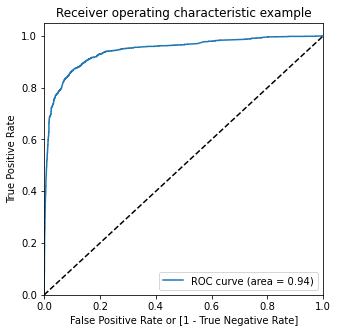

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

__Optimal cutoff probability is that prob where we get balanced sensitivity and specificity__

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
4353          1         0.975233          1    1    1    1    1    1    1   
561           0         0.184513          0    1    1    0    0    0    0   
1618          0         0.982166          1    1    1    1    1    1    1   
647           1         0.656059          1    1    1    1    1    1    1   
4435          0         0.314975          0    1    1    1    1    0    0   

      0.6  0.7  0.8  0.9  
4353    1    1    1    1  
561     0    0    0    0  
1618    1    1    1    1  
647     1    0    0    0  
4435    0    0    0    0

In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.397963  1.000000  0.000000
0.1   0.1  0.763294  0.958785  0.634069
0.2   0.2  0.849448  0.930586  0.795813
0.3   0.3  0.870856  0.904121  0.848867
0.4   0.4  0.885014  0.873319  0.892744
0.5   0.5  0.887604  0.839913  0.919128
0.6   0.6  0.883115  0.783948  0.948666
0.7   0.7  0.879489  0.748807  0.965873
0.8   0.8  0.863778  0.687202  0.980499
0.9   0.9  0.809738  0.538395  0.989102


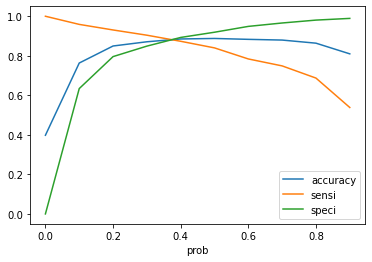

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**The above graph shows approx .38 is the cutoff**

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
4353          1         0.975233          1    1    1    1    1    1    1   
561           0         0.184513          0    1    1    0    0    0    0   
1618          0         0.982166          1    1    1    1    1    1    1   
647           1         0.656059          1    1    1    1    1    1    1   
4435          0         0.314975          0    1    1    1    1    0    0   

      0.6  0.7  0.8  0.9  final_predicted  
4353    1    1    1    1                1  
561     0    0    0    0                0  
1618    1    1    1    1                1  
647     1    0    0    0                1  
4435    0    0    0    0                0

In [140]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8806975138121547

In [141]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3079,  408],
       [ 283, 2022]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8772234273318872

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.8829939776312016

In [145]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1170060223687984


In [146]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8320987654320988


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9158239143367043


**The cutoff = 0.38 sensitivity : 87% ,  specificity : 88%  and accuracy : 88%**

**Precision and Recall**

In [148]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3205,  282],
       [ 369, 1936]], dtype=int64)

##### Precision
TP / TP + FP

In [149]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.872858431018936

##### Recall
TP / TP + FN

In [150]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8399132321041215

Using sklearn utilities for the same

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.872858431018936

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8399132321041215

**Precision and recall tradeoff**

In [153]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(4353    1
 561     0
 1618    0
 647     1
 4435    0
        ..
 358     1
 81      1
 9002    0
 7879    0
 6471    0
 Name: Converted, Length: 5792, dtype: int64,
 4353    1
 561     0
 1618    1
 647     1
 4435    0
        ..
 358     1
 81      1
 9002    0
 7879    1
 6471    0
 Name: Predicted, Length: 5792, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

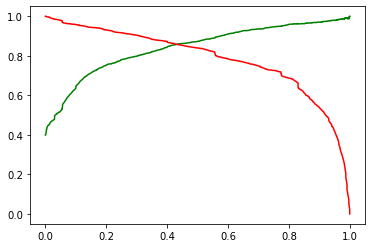

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Assigning Lead Score to the Test data**

In [156]:
y_train_pred_final["Lead Score"] = y_train_pred_final.Conversion_Prob.map(lambda x : round(x*100))

In [157]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
4353          1         0.975233          1    1    1    1    1    1    1   
561           0         0.184513          0    1    1    0    0    0    0   
1618          0         0.982166          1    1    1    1    1    1    1   
647           1         0.656059          1    1    1    1    1    1    1   
4435          0         0.314975          0    1    1    1    1    0    0   

      0.6  0.7  0.8  0.9  final_predicted  Lead Score  
4353    1    1    1    1                1          98  
561     0    0    0    0                0          18  
1618    1    1    1    1                1          98  
647     1    0    0    0                1          66  
4435    0    0    0    0                0          31

### 5. Making Predictions on Test set

In [158]:
# Apply scaler() to [TotalVisits, Total Time Spent on Website,Total Time Spent on Website]
num_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [159]:
df_test.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
8940       581802          0        0.000                     0.000000   
2639       634153          1        0.125                     0.296215   
929        650459          0        0.000                     0.000000   
5073       611183          0        0.250                     0.059419   
873        651250          0        0.125                     0.130722   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
8940              0.000000                                    0   
2639              0.181818                                    0   
929               0.000000                                    0   
5073              0.363636                                    1   
873               0.181818                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
8940                          0                        0   
2639                          0                        0   
929                           0                        0   
5073                          0                        0   
873                           0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
8940                           0                     0                   0   
2639                           0                     0                   1   
929                            0                     0                   0   
5073                           0                     0                   1   
873                            0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
8940                       1                           0                   0   
2639                       0                           0                   0   
929                        1                           0                   0   
5073                       0                           0                   0   
873                        0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8940                      0                           0   
2639                      0                           0   
929                       0                           0   
5073                      0                           0   
873                       0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
8940                             0                            0   
2639                             0                            0   
929                              0                            0   
5073                             0                            0   
873                              0                            1   

      Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
8940                                 0                                0   
2639                                 0                                0   
929                                  0                                0   
5073                                 0                                0   
873                                  0                                0   

      Last Activity_Email Opened  Last Activity_Email Received  \
8940                           0                             0   
2639                           1                             0   
929                            0                             0   
5073                           0                             0   
873                            0                             0   

      Last Activity_Form Submitted on Website  \
8940                                        0   
2639                                        0   
929                                         0   
5073                                        0

__Dividing in X and Y sets for predictions__

In [160]:
X_test = df_test

y_test = df_test.pop('Converted')

In [161]:
print(X_test.shape)
print(y_test.shape)

(2483, 97)
(2483,)


In [162]:
#Assigning the final col to the X_test set
test_col = X_train.columns
X_test = X_test[test_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
8940                     0.000000                                    0   
2639                     0.296215                                    0   
929                      0.000000                                    0   
5073                     0.059419                                    1   
873                      0.130722                                    0   

      Lead Origin_Lead Add Form  Last Activity_SMS Sent  \
8940                          0                       0   
2639                          0                       0   
929                           0                       0   
5073                          0                       1   
873                           0                       0   

      Specialization_Unknown  What is your current occupation_Unknown  \
8940                       1                                        0   
2639                       1                                        0   
929                        1                                        1   
5073                       0                                        1   
873                        1                                        0   

      What is your current occupation_Working Professional  \
8940                                                  0      
2639                                                  0      
929                                                   0      
5073                                                  0      
873                                                   0      

      Tags_Interested in other courses  Tags_Ringing  \
8940                                 0             0   
2639                                 0             0   
929                                  0             0   
5073                                 0             0   
873                                  0             1   

      Tags_Will revert after reading the email  Last Notable Activity_Modified  
8940                                         0                               1  
2639                                         1                               0  
929                                          1                               1  
5073                                         1                               1  
873                                          0                               0

In [163]:
X_test.shape

(2483, 11)

In [164]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

In [165]:
# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)

In [166]:
y_test_pred[:10]

8940    0.056404
2639    0.806960
929     0.031357
5073    0.122361
873     0.006749
5817    0.999229
5795    0.999229
3711    0.805278
7268    0.982878
7036    0.998430
dtype: float64

In [167]:
#in a df put together the predicted values and the converted values in y_test

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

y_pred_df

0
8940  0.056404
2639  0.806960
929   0.031357
5073  0.122361
873   0.006749
...        ...
2576  0.083719
1810  0.154637
1570  0.998550
2783  0.972122
982   0.647406

[2483 rows x 1 columns]

In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

Converted
8940          0
2639          1
929           0
5073          0
873           0
...         ...
2576          0
1810          0
1570          1
2783          1
982           1

[2483 rows x 1 columns]

In [169]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.056404
1          1         0.806960
2          0         0.031357
3          0         0.122361
4          0         0.006749

**Precision and Recall trade-off**

In [170]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)


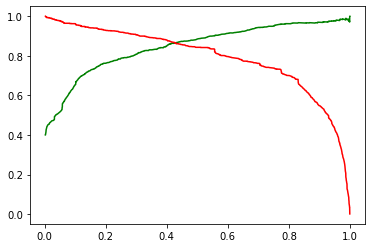

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**On test data cutoff is approx 0.42**

In [172]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.056404                0
1          1         0.806960                1
2          0         0.031357                0
3          0         0.122361                0
4          0         0.006749                0

In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8928715263793798

In [174]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1360,  136],
       [ 130,  857]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8682877406281662

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.9090909090909091

**Precision and recall**

##### Precision
TP / TP + FP

In [178]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.872858431018936

##### Recall
TP / TP + FN



In [179]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8399132321041215

**Assigning Lead Score to the Test data**

In [180]:
y_pred_final["Lead Score"] = y_pred_final.Conversion_Prob.map(lambda x : round(x*100))

In [181]:
y_pred_final.head()

Converted  Conversion_Prob  final_predicted  Lead Score
0          0         0.056404                0           6
1          1         0.806960                1          81
2          0         0.031357                0           3
3          0         0.122361                0          12
4          0         0.006749                0           1

### 7. Conclusions:


### On Train data and Test data
    
   
   **Train Data**
           
           - Accuracy : 88%
           - Sensitivity : 87%
           - Specificity : 88%   
   
   **Test Data**
           
           - Accuracy : 89% 
           - Sensitivity : 86%
           - Specificity : 90%

**Arranging the features based on coeff values**

In [182]:
result.params.sort_values(ascending=False)

Total Time Spent on Website                             4.059334
Lead Origin_Lead Add Form                               3.054374
Tags_Will revert after reading the email                2.412824
What is your current occupation_Working Professional    1.523368
Last Activity_SMS Sent                                  1.358609
Last Notable Activity_Modified                         -0.632282
Specialization_Unknown                                 -1.002875
Lead Origin_Landing Page Submission                    -1.142477
const                                                  -1.182009
Tags_Interested in other courses                       -2.959450
What is your current occupation_Unknown                -3.026126
Tags_Ringing                                           -3.337376
dtype: float64